In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
import pyCompare
from statannotations.Annotator import Annotator
from scipy import stats
from scipy.stats import wilcoxon

In [2]:
path_database ="/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/"
data_right =pd.read_excel( path_database + "/right_sct_c1_c7.xlsx") 

In [3]:

df1 = data_right
df_left = df1.filter(['Size voxels left','Subject','Slice','Slab','Region','Class','Level'], axis=1)
df_left.insert(0, 'Laterality', 'Left')
df_left.rename(columns={'Size voxels left': 'voxels'}, inplace=True)
df_right = df1.filter(['Size voxels right','Subject','Slice','Slab','Region','Class','Level'], axis=1)
df_right.insert(0, 'Laterality', 'Right')
df_right.rename(columns={'Size voxels right': 'voxels'}, inplace=True)

frames = [df_left, df_right]
result_right = pd.concat(frames, axis=0)
result_right['Region'] = result_right['Region'].replace('ventral-horn', 'GM_ventral-horn')
result_right['Region'] = result_right['Region'].replace('intermediate-zone', 'GM_intermediate-zone')
result_right['Region'] = result_right['Region'].replace('dorsal-horn', 'GM_dorsal-horn')
result_right['Region'] = result_right['Region'].replace('dorsal-column', 'WM_dorsal-column')
result_right['Region'] = result_right['Region'].replace('lateral-funiculi', 'WM_lateral-funiculi')
result_right['Region'] = result_right['Region'].replace('ventral-funiculi', 'WM_ventral-funiculi')
result_right['area'] = result_right['voxels'] * 0.3 * 0.3
result_right

,Laterality,voxels,Subject,Slab,Region,Class,Level,area
0,Left,345.459849,sub-001,run-1,SC,SC,C3,31.091386
1,Left,329.738353,sub-001,run-1,SC,SC,C3,29.676452
2,Left,325.807826,sub-001,run-1,SC,SC,C3,29.322704
3,Left,325.522577,sub-001,run-1,SC,SC,C2,29.297032
4,Left,335.075025,sub-001,run-1,SC,SC,C2,30.156752
...,...,...,...,...,...,...,...,...
15190,Right,8.335061,sub-026,run-2,ventrolateral-reticulospinal,WM,C6,0.750155
15191,Right,8.660577,sub-026,run-2,ventrolateral-reticulospinal,WM,C5,0.779452
15192,Right,8.153478,sub-026,run-2,ventrolateral-reticulospinal,WM,C5,0.733813
15193,Right,9.892666,sub-026,run-2,ventrolateral-reticulospinal,WM,C5,0.890340


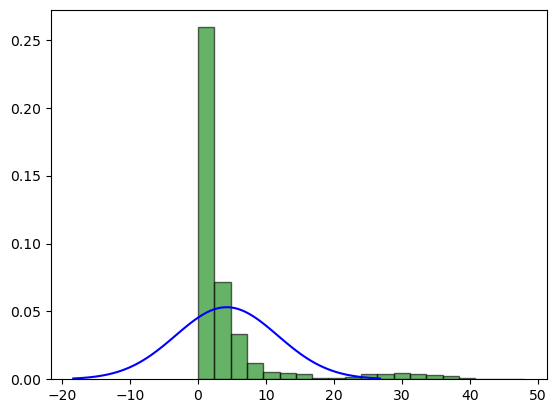

In [4]:
data = result_right['area']
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', edgecolor='k')
mu, sigma = np.mean(data), np.std(data)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2), color='b')
plt.show()

     Laterality     voxels  Subject   Slab                Region Class Level  \
1451       Left  11.709726  sub-001  run-2   reticular-formation    GM    C7   
1452       Left   9.681618  sub-001  run-2   reticular-formation    GM    C7   
1453       Left   9.110116  sub-001  run-2   reticular-formation    GM    C7   
1454       Left   9.421349  sub-001  run-2   reticular-formation    GM    C6   
1455       Left   9.488481  sub-001  run-2   reticular-formation    GM    C6   
...         ...        ...      ...    ...                   ...   ...   ...   
6248      Right   6.418313  sub-026  run-2  lateral-ventral-horn    GM    C6   
6249      Right   6.548511  sub-026  run-2  lateral-ventral-horn    GM    C5   
6250      Right   7.786918  sub-026  run-2  lateral-ventral-horn    GM    C5   
6251      Right   5.458036  sub-026  run-2  lateral-ventral-horn    GM    C5   
6252      Right   6.027552  sub-026  run-2  lateral-ventral-horn    GM    C5   

          area  
1451  1.053875  
1452 

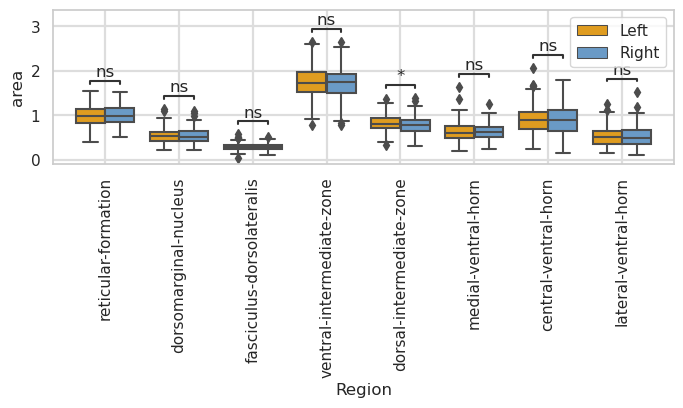

In [5]:
df = result_right
categorias_seleccionadas = ["reticular-formation" ,"dorsomarginal-nucleus", "fasciculus-dorsolateralis", 
"ventral-intermediate-zone","dorsal-intermediate-zone","medial-ventral-horn" , "central-ventral-horn" ,"lateral-ventral-horn"]
level = ['C5','C6','C7']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]
print(nuevo_df)
sns.set(style="whitegrid")

plt.figure(figsize=(8,2))
custom_palette1 = ["#FFA500","#5B9BD5"]
#ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", palette= custom_palette1)
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="area", hue="Laterality", palette= custom_palette1) #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=90)
plt.legend(loc='upper right')

pairs=[
    (("reticular-formation","Left"), ("reticular-formation","Right")),
    (("dorsomarginal-nucleus","Left"), ("dorsomarginal-nucleus","Right")),
    (("fasciculus-dorsolateralis","Left"), ("fasciculus-dorsolateralis","Right")),
    (("ventral-intermediate-zone","Left"), ("ventral-intermediate-zone","Right")),
    (("dorsal-intermediate-zone","Left"), ("dorsal-intermediate-zone","Right")),
    (("medial-ventral-horn","Left"), ("medial-ventral-horn","Right")),
    (("central-ventral-horn","Left"), ("central-ventral-horn","Right")),
    (("lateral-ventral-horn","Left"), ("lateral-ventral-horn","Right")),
    ]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="area", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/final_csa_GM_c5-C7.pdf')

      Laterality     voxels  Subject   Slab                        Region  \
7197        Left  29.601886  sub-001  run-2           fasciculus-gracilis   
7198        Left  26.795185  sub-001  run-2           fasciculus-gracilis   
7199        Left  31.055789  sub-001  run-2           fasciculus-gracilis   
7200        Left  38.341112  sub-001  run-2           fasciculus-gracilis   
7201        Left  33.682756  sub-001  run-2           fasciculus-gracilis   
...          ...        ...      ...    ...                           ...   
15190      Right   8.335061  sub-026  run-2  ventrolateral-reticulospinal   
15191      Right   8.660577  sub-026  run-2  ventrolateral-reticulospinal   
15192      Right   8.153478  sub-026  run-2  ventrolateral-reticulospinal   
15193      Right   9.892666  sub-026  run-2  ventrolateral-reticulospinal   
15194      Right   7.961769  sub-026  run-2  ventrolateral-reticulospinal   

      Class Level      area  
7197     WM    C7  2.664170  
7198     WM    

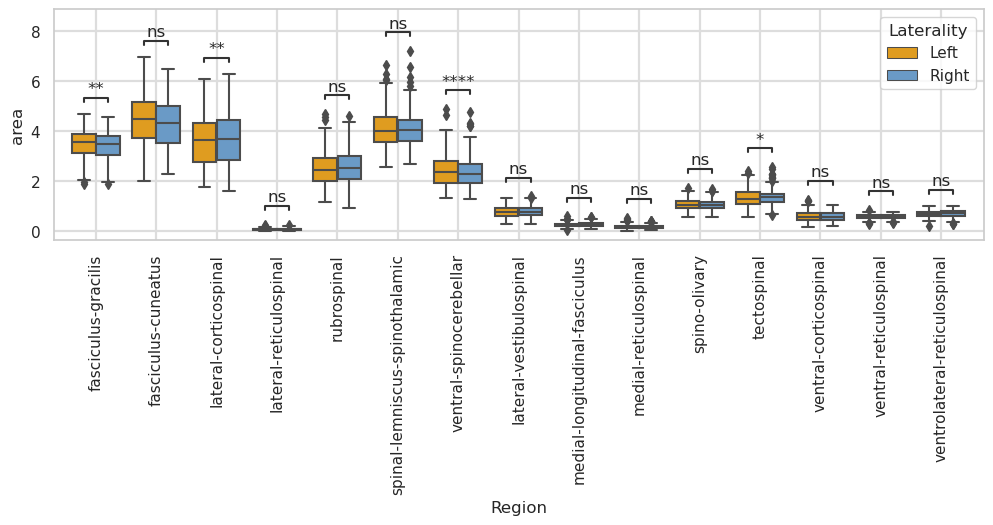

In [6]:
df = result_right
categorias_seleccionadas = ["fasciculus-gracilis" , "fasciculus-cuneatus", "lateral-corticospinal", "lateral-reticulospinal","rubrospinal",
"spinal-lemniscus-spinothalamic", "ventral-spinocerebellar", "lateral-vestibulospinal", "medial-longitudinal-fasciculus" ,
"medial-reticulospinal", "spino-olivary","tectospinal","ventral-corticospinal", "ventral-reticulospinal",
                            "ventrolateral-reticulospinal"]
level = ['C5','C6','C7']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]
print (nuevo_df)
sns.set(style="whitegrid")
plt.figure(figsize=(12,3))
custom_palette1 = ["#FFA500","#5B9BD5"]
#ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", palette= custom_palette1)
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="area", hue="Laterality", palette= custom_palette1)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=90)
#ax_csa_gm.get_legend().set_visible(False)

pairs=[
    (("fasciculus-gracilis","Left"), ("fasciculus-gracilis","Right")),
    (("fasciculus-cuneatus","Left"), ("fasciculus-cuneatus","Right")),
    (("lateral-corticospinal","Left"), ("lateral-corticospinal","Right")),
    (("lateral-reticulospinal","Left"), ("lateral-reticulospinal","Right")),
    (("rubrospinal","Left"), ("rubrospinal","Right")),
    (("spinal-lemniscus-spinothalamic","Left"), ("spinal-lemniscus-spinothalamic","Right")),
    (("ventral-spinocerebellar","Left"), ("ventral-spinocerebellar","Right")),
    (("lateral-vestibulospinal","Left"), ("lateral-vestibulospinal","Right")),
    (("medial-longitudinal-fasciculus","Left"), ("medial-longitudinal-fasciculus","Right")),
    (("medial-reticulospinal","Left"), ("medial-reticulospinal","Right")),
    (("spino-olivary","Left"), ("spino-olivary","Right")),
    (("tectospinal","Left"), ("tectospinal","Right")),
    (("ventral-corticospinal","Left"), ("ventral-corticospinal","Right")),
    (("ventral-reticulospinal","Left"), ("ventral-reticulospinal","Right")),
    (("ventrolateral-reticulospinal","Left"), ("ventrolateral-reticulospinal","Right"))]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="area", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/final_csa_WM_c5-C7.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WM_ventral-funiculi_Left vs. WM_ventral-funiculi_Right: Wilcoxon test (paired samples), P_val:2.217e-02 Stat=2.990e+02
GM_Left vs. GM_Right: Wilcoxon test (paired samples), P_val:8.827e-01 Stat=5.270e+02
SC_Left vs. SC_Right: Wilcoxon test (paired samples), P_val:7.806e-01 Stat=5.150e+02
GM_dorsal-horn_Left vs. GM_dorsal-horn_Right: Wilcoxon test (paired samples), P_val:4.412e-01 Stat=4.700e+02
GM_ventral-horn_Left vs. GM_ventral-horn_Right: Wilcoxon test (paired samples), P_val:3.175e-01 Stat=4.490e+02
GM_intermediate-zone_Left vs. GM_intermediate-zone_Right: Wilcoxon test (paired samples), P_val:8.313e-01 Stat=5.210e+02
WM_dorsal-column_Left vs. WM_dorsal-column_Right: Wilcoxon test (paired samples), P_val:9.061e-02 Stat=3.500e+02
WM_lateral-funiculi_Left vs. WM_lateral-funiculi_Right: Wilcoxon test (paire

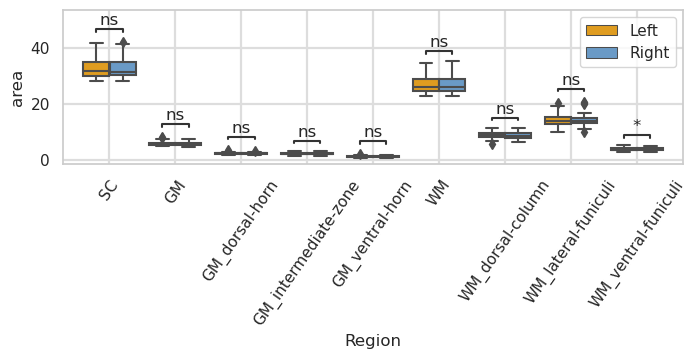

In [7]:
df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C1']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]

sns.set(style="whitegrid")


plt.figure(figsize=(8,2))

#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="area", hue="Laterality", palette= custom_palette1) #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)
#sns.set()
plt.xticks(rotation=55)
plt.legend(loc='best')

pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="area", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/csa_all_c1.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WM_ventral-funiculi_Left vs. WM_ventral-funiculi_Right: Wilcoxon test (paired samples), P_val:7.491e-01 Stat=1.257e+03
GM_Left vs. GM_Right: Wilcoxon test (paired samples), P_val:5.983e-04 Stat=7.750e+02
SC_Left vs. SC_Right: Wilcoxon test (paired samples), P_val:3.808e-05 Stat=6.450e+02
GM_dorsal-horn_Left vs. GM_dorsal-horn_Right: Wilcoxon test (paired samples), P_val:1.675e-02 Stat=9.720e+02
GM_ventral-horn_Left vs. GM_ventral-horn_Right: Wilcoxon test (paired samples), P_val:6.882e-01 Stat=1.349e+03
GM_intermediate-zone_Left vs. GM_intermediate-zone_Right: Wilcoxon test (paired samples), P_val:1.044e-02 Stat=9.400e+02
WM_dorsal-column_Left vs. WM_dorsal-column_Right: Wilcoxon test (paired samples), P_val:1.037e-01 Stat=1.024e+03
WM_lateral-funiculi_Left vs. WM_lateral-funiculi_Right: Wilcoxon test (paire

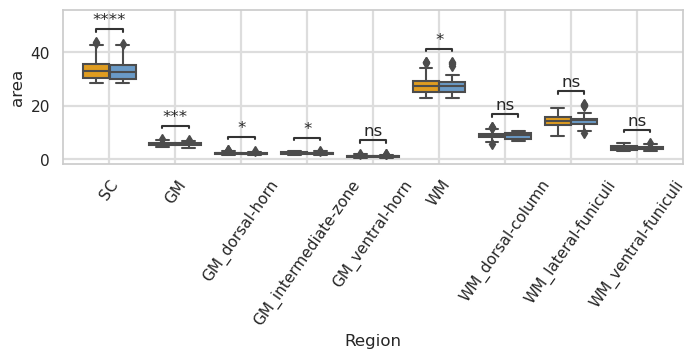

In [8]:
df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C2']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]

sns.set(style="whitegrid")


plt.figure(figsize=(8,2))

#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="area", hue="Laterality", palette= custom_palette1) #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)
#sns.set()
plt.xticks(rotation=55)
ax_csa_gm.get_legend().set_visible(False)
pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="area", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/csa_all_c2.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WM_ventral-funiculi_Left vs. WM_ventral-funiculi_Right: Wilcoxon test (paired samples), P_val:6.793e-02 Stat=1.174e+03
GM_Left vs. GM_Right: Wilcoxon test (paired samples), P_val:7.029e-01 Stat=1.619e+03
SC_Left vs. SC_Right: Wilcoxon test (paired samples), P_val:1.931e-01 Stat=1.420e+03
GM_dorsal-horn_Left vs. GM_dorsal-horn_Right: Wilcoxon test (paired samples), P_val:9.797e-01 Stat=1.696e+03
GM_ventral-horn_Left vs. GM_ventral-horn_Right: Wilcoxon test (paired samples), P_val:8.258e-02 Stat=1.326e+03
GM_intermediate-zone_Left vs. GM_intermediate-zone_Right: Wilcoxon test (paired samples), P_val:6.021e-02 Stat=1.295e+03
WM_dorsal-column_Left vs. WM_dorsal-column_Right: Wilcoxon test (paired samples), P_val:7.784e-01 Stat=1.484e+03
WM_lateral-funiculi_Left vs. WM_lateral-funiculi_Right: Wilcoxon test (paire

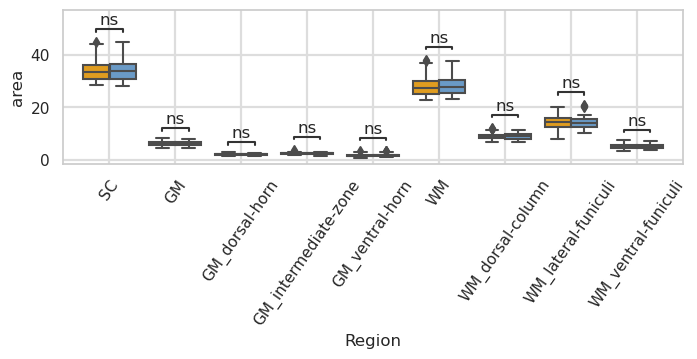

In [9]:
df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C3']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]

sns.set(style="whitegrid")

plt.figure(figsize=(8,2))

#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="area", hue="Laterality", palette= custom_palette1) #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)
#sns.set()
plt.xticks(rotation=55)
ax_csa_gm.get_legend().set_visible(False)
pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="area", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/csa_all_c3.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WM_ventral-funiculi_Left vs. WM_ventral-funiculi_Right: Wilcoxon test (paired samples), P_val:2.900e-01 Stat=1.664e+03
GM_Left vs. GM_Right: Wilcoxon test (paired samples), P_val:9.432e-01 Stat=2.075e+03
SC_Left vs. SC_Right: Wilcoxon test (paired samples), P_val:6.547e-01 Stat=1.980e+03
GM_dorsal-horn_Left vs. GM_dorsal-horn_Right: Wilcoxon test (paired samples), P_val:1.442e-01 Stat=1.724e+03
GM_ventral-horn_Left vs. GM_ventral-horn_Right: Wilcoxon test (paired samples), P_val:9.255e-02 Stat=1.668e+03
GM_intermediate-zone_Left vs. GM_intermediate-zone_Right: Wilcoxon test (paired samples), P_val:9.086e-01 Stat=2.064e+03
WM_dorsal-column_Left vs. WM_dorsal-column_Right: Wilcoxon test (paired samples), P_val:7.541e-01 Stat=1.840e+03
WM_lateral-funiculi_Left vs. WM_lateral-funiculi_Right: Wilcoxon test (paire

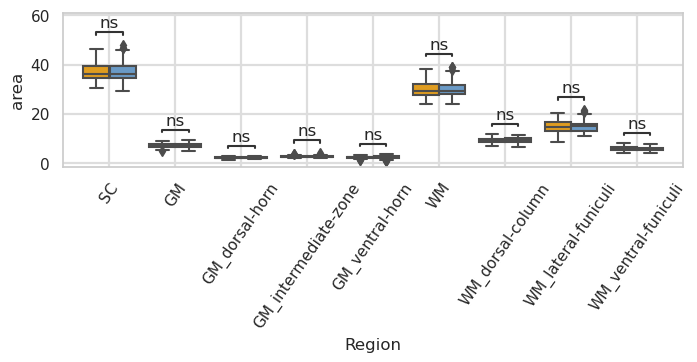

In [10]:
df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C4']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]

sns.set(style="whitegrid")


plt.figure(figsize=(8,2))

#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="area", hue="Laterality", palette= custom_palette1) #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)
#sns.set()
plt.xticks(rotation=55)
ax_csa_gm.get_legend().set_visible(False)
pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="area", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/csa_all_c4.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WM_ventral-funiculi_Left vs. WM_ventral-funiculi_Right: Wilcoxon test (paired samples), P_val:2.593e-01 Stat=1.314e+03
GM_Left vs. GM_Right: Wilcoxon test (paired samples), P_val:5.924e-01 Stat=1.433e+03
SC_Left vs. SC_Right: Wilcoxon test (paired samples), P_val:5.993e-01 Stat=1.435e+03
GM_dorsal-horn_Left vs. GM_dorsal-horn_Right: Wilcoxon test (paired samples), P_val:8.246e-01 Stat=1.496e+03
GM_ventral-horn_Left vs. GM_ventral-horn_Right: Wilcoxon test (paired samples), P_val:2.765e-01 Stat=1.322e+03
GM_intermediate-zone_Left vs. GM_intermediate-zone_Right: Wilcoxon test (paired samples), P_val:9.187e-01 Stat=1.520e+03
WM_dorsal-column_Left vs. WM_dorsal-column_Right: Wilcoxon test (paired samples), P_val:1.731e-01 Stat=1.267e+03
WM_lateral-funiculi_Left vs. WM_lateral-funiculi_Right: Wilcoxon test (paire

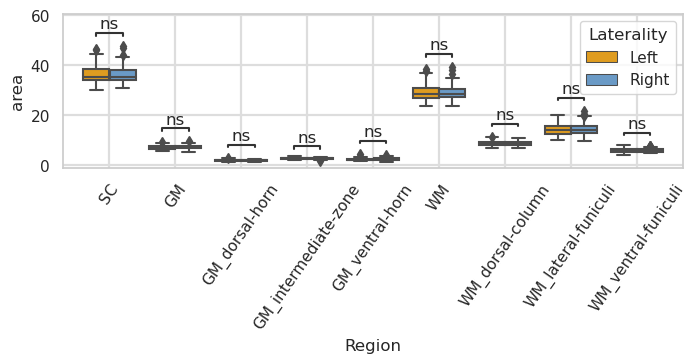

In [11]:
df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C5']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]

sns.set(style="whitegrid")


plt.figure(figsize=(8,2))

#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="area", hue="Laterality", palette= custom_palette1) #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)
#sns.set()
plt.xticks(rotation=55)
#ax_csa_gm.get_legend().set_visible(False)
pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="area", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/csa_all_c5.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WM_ventral-funiculi_Left vs. WM_ventral-funiculi_Right: Wilcoxon test (paired samples), P_val:9.619e-02 Stat=7.650e+02
GM_Left vs. GM_Right: Wilcoxon test (paired samples), P_val:9.345e-01 Stat=9.960e+02
SC_Left vs. SC_Right: Wilcoxon test (paired samples), P_val:8.053e-01 Stat=9.720e+02
GM_dorsal-horn_Left vs. GM_dorsal-horn_Right: Wilcoxon test (paired samples), P_val:2.981e-01 Stat=8.560e+02
GM_ventral-horn_Left vs. GM_ventral-horn_Right: Wilcoxon test (paired samples), P_val:8.857e-01 Stat=9.870e+02
GM_intermediate-zone_Left vs. GM_intermediate-zone_Right: Wilcoxon test (paired samples), P_val:4.680e-01 Stat=9.020e+02
WM_dorsal-column_Left vs. WM_dorsal-column_Right: Wilcoxon test (paired samples), P_val:1.841e-01 Stat=8.140e+02
WM_lateral-funiculi_Left vs. WM_lateral-funiculi_Right: Wilcoxon test (paire

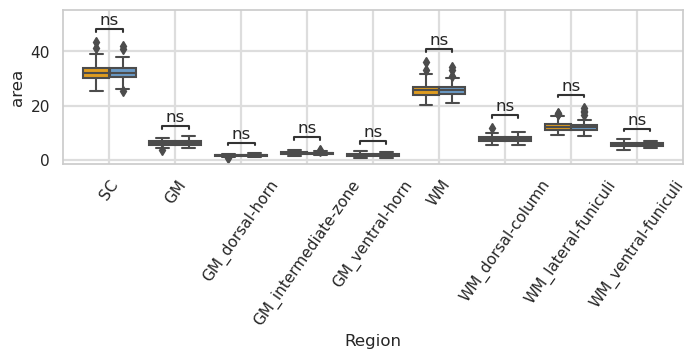

In [12]:
df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C6']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]

sns.set(style="whitegrid")


plt.figure(figsize=(8,2))

#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="area", hue="Laterality", palette= custom_palette1) #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)
#sns.set()
plt.xticks(rotation=55)
ax_csa_gm.get_legend().set_visible(False)
pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="area", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/csa_all_c6.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WM_ventral-funiculi_Left vs. WM_ventral-funiculi_Right: Wilcoxon test (paired samples), P_val:4.810e-01 Stat=4.760e+02
GM_Left vs. GM_Right: Wilcoxon test (paired samples), P_val:1.143e-02 Stat=3.090e+02
SC_Left vs. SC_Right: Wilcoxon test (paired samples), P_val:1.074e-02 Stat=3.070e+02
GM_dorsal-horn_Left vs. GM_dorsal-horn_Right: Wilcoxon test (paired samples), P_val:9.434e-01 Stat=5.340e+02
GM_ventral-horn_Left vs. GM_ventral-horn_Right: Wilcoxon test (paired samples), P_val:2.619e-02 Stat=3.370e+02
GM_intermediate-zone_Left vs. GM_intermediate-zone_Right: Wilcoxon test (paired samples), P_val:2.345e-03 Stat=2.620e+02
WM_dorsal-column_Left vs. WM_dorsal-column_Right: Wilcoxon test (paired samples), P_val:1.195e-01 Stat=3.980e+02
WM_lateral-funiculi_Left vs. WM_lateral-funiculi_Right: Wilcoxon test (paire

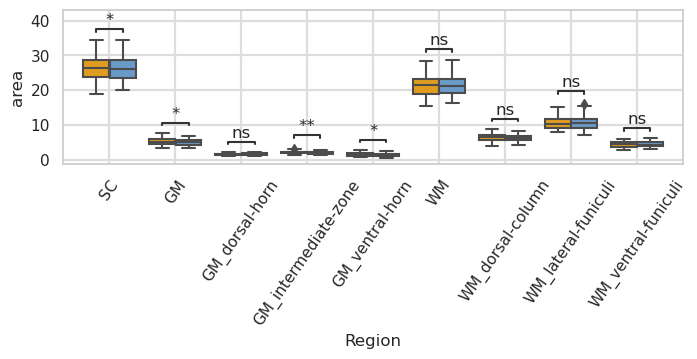

In [13]:
df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C7']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]

sns.set(style="whitegrid")


plt.figure(figsize=(8,2))

#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="area", hue="Laterality", palette= custom_palette1) #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)
#sns.set()
plt.xticks(rotation=55)
ax_csa_gm.get_legend().set_visible(False)
pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="area", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/csa_all_c7.pdf')

In [14]:
df1 = data_right
df_left = df1.filter(['T1 mean left','Subject','Slice','Slab','Region','Class','Level'], axis=1)
df_left.insert(0, 'Laterality', 'Left')
df_left.rename(columns={'T1 mean left': 'T1'}, inplace=True)
df_right = df1.filter(['T1 mean right','Subject','Slice','Slab','Region','Class','Level'], axis=1)
df_right.insert(0, 'Laterality', 'Right')
df_right.rename(columns={'T1 mean right': 'T1'}, inplace=True)

frames = [df_left, df_right]
result_right = pd.concat(frames, axis=0)
result_right['Region'] = result_right['Region'].replace('ventral-horn', 'GM_ventral-horn')
result_right['Region'] = result_right['Region'].replace('intermediate-zone', 'GM_intermediate-zone')
result_right['Region'] = result_right['Region'].replace('dorsal-horn', 'GM_dorsal-horn')
result_right['Region'] = result_right['Region'].replace('dorsal-column', 'WM_dorsal-column')
result_right['Region'] = result_right['Region'].replace('lateral-funiculi', 'WM_lateral-funiculi')
result_right['Region'] = result_right['Region'].replace('ventral-funiculi', 'WM_ventral-funiculi')
result_right

,Laterality,T1,Subject,Slab,Region,Class,Level
0,Left,1178.844691,sub-001,run-1,SC,SC,C3
1,Left,1163.468521,sub-001,run-1,SC,SC,C3
2,Left,1141.452258,sub-001,run-1,SC,SC,C3
3,Left,1184.000234,sub-001,run-1,SC,SC,C2
4,Left,1190.933370,sub-001,run-1,SC,SC,C2
...,...,...,...,...,...,...,...
15190,Right,1090.915751,sub-026,run-2,ventrolateral-reticulospinal,WM,C6
15191,Right,1062.389416,sub-026,run-2,ventrolateral-reticulospinal,WM,C5
15192,Right,1074.589807,sub-026,run-2,ventrolateral-reticulospinal,WM,C5
15193,Right,1089.940030,sub-026,run-2,ventrolateral-reticulospinal,WM,C5


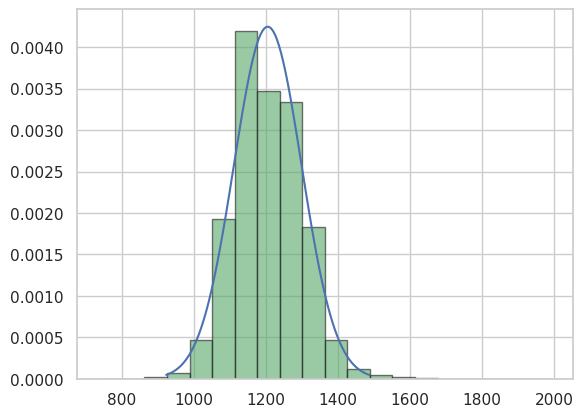

In [21]:
data = result_right['T1']
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', edgecolor='k')
mu, sigma = np.mean(data), np.std(data)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2), color='b')
plt.show()

      Laterality           T1  Subject   Slab               Region Class Level
6           Left  1169.914699  sub-001  run-1                   SC    SC    C1
7           Left  1030.830923  sub-001  run-1                   SC    SC    C1
24          Left  1196.232863  sub-002  run-1                   SC    SC    C1
25          Left  1192.196153  sub-002  run-1                   SC    SC    C1
26          Left  1210.864139  sub-002  run-1                   SC    SC    C1
...          ...          ...      ...    ...                  ...   ...   ...
11361      Right  1115.353315  sub-024  run-1  WM_ventral-funiculi    WM    C1
11394      Right  1128.529798  sub-025  run-1  WM_ventral-funiculi    WM    C1
11395      Right  1141.174512  sub-025  run-1  WM_ventral-funiculi    WM    C1
11396      Right  1146.668854  sub-025  run-1  WM_ventral-funiculi    WM    C1
11412      Right  1135.919550  sub-026  run-1  WM_ventral-funiculi    WM    C1

[812 rows x 7 columns]
p-value annotation legend:
 

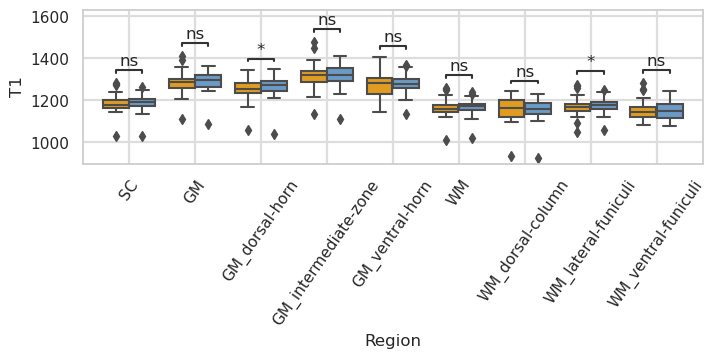

In [15]:

df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C1']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]
print(nuevo_df)
sns.set(style="whitegrid")
plt.figure(figsize=(8,2))
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality" , palette= custom_palette1)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=55)
ax_csa_gm.get_legend().set_visible(False)
pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/T1_all_c1.pdf')

      Laterality           T1  Subject   Slab               Region Class Level
3           Left  1184.000234  sub-001  run-1                   SC    SC    C2
4           Left  1190.933370  sub-001  run-1                   SC    SC    C2
5           Left  1200.252724  sub-001  run-1                   SC    SC    C2
21          Left  1162.226855  sub-002  run-1                   SC    SC    C2
22          Left  1170.124606  sub-002  run-1                   SC    SC    C2
...          ...          ...      ...    ...                  ...   ...   ...
11407      Right  1092.552511  sub-026  run-1  WM_ventral-funiculi    WM    C2
11408      Right  1102.224318  sub-026  run-1  WM_ventral-funiculi    WM    C2
11409      Right  1123.471894  sub-026  run-1  WM_ventral-funiculi    WM    C2
11410      Right  1173.258618  sub-026  run-1  WM_ventral-funiculi    WM    C2
11411      Right  1161.828511  sub-026  run-1  WM_ventral-funiculi    WM    C2

[1326 rows x 7 columns]
p-value annotation legend:


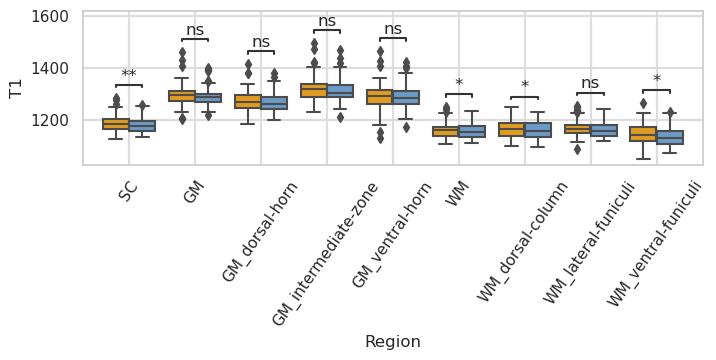

In [16]:

df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C2']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]
print(nuevo_df)
sns.set(style="whitegrid")
plt.figure(figsize=(8,2))
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality" , palette= custom_palette1)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=55)
ax_csa_gm.get_legend().set_visible(False)
pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/T1_all_c2.pdf')

      Laterality           T1  Subject   Slab               Region Class Level
0           Left  1178.844691  sub-001  run-1                   SC    SC    C3
1           Left  1163.468521  sub-001  run-1                   SC    SC    C3
2           Left  1141.452258  sub-001  run-1                   SC    SC    C3
36          Left  1183.615828  sub-003  run-1                   SC    SC    C3
37          Left  1213.326482  sub-003  run-1                   SC    SC    C3
...          ...          ...      ...    ...                  ...   ...   ...
11402      Right  1097.629522  sub-026  run-1  WM_ventral-funiculi    WM    C3
11403      Right  1109.879307  sub-026  run-1  WM_ventral-funiculi    WM    C3
11404      Right  1092.493143  sub-026  run-1  WM_ventral-funiculi    WM    C3
11405      Right  1073.748683  sub-026  run-1  WM_ventral-funiculi    WM    C3
11406      Right  1099.684446  sub-026  run-1  WM_ventral-funiculi    WM    C3

[1444 rows x 7 columns]
p-value annotation legend:


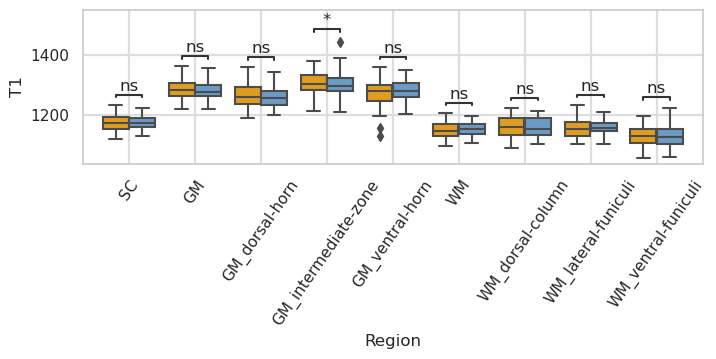

In [17]:

df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C3']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]
print(nuevo_df)
sns.set(style="whitegrid")
plt.figure(figsize=(8,2))
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality" , palette= custom_palette1)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=55)
ax_csa_gm.get_legend().set_visible(False)
pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/T1_all_c3.pdf')

      Laterality           T1  Subject   Slab               Region Class Level
18          Left  1155.330409  sub-001  run-2                   SC    SC    C4
19          Left  1204.751722  sub-001  run-2                   SC    SC    C4
20          Left  1197.628951  sub-001  run-2                   SC    SC    C4
32          Left  1125.147153  sub-002  run-2                   SC    SC    C4
33          Left  1116.572043  sub-002  run-2                   SC    SC    C4
...          ...          ...      ...    ...                  ...   ...   ...
11397      Right  1115.747643  sub-026  run-1  WM_ventral-funiculi    WM    C4
11398      Right  1143.873812  sub-026  run-1  WM_ventral-funiculi    WM    C4
11399      Right  1119.566586  sub-026  run-1  WM_ventral-funiculi    WM    C4
11400      Right  1093.878673  sub-026  run-1  WM_ventral-funiculi    WM    C4
11401      Right  1084.467099  sub-026  run-1  WM_ventral-funiculi    WM    C4

[1606 rows x 7 columns]
p-value annotation legend:


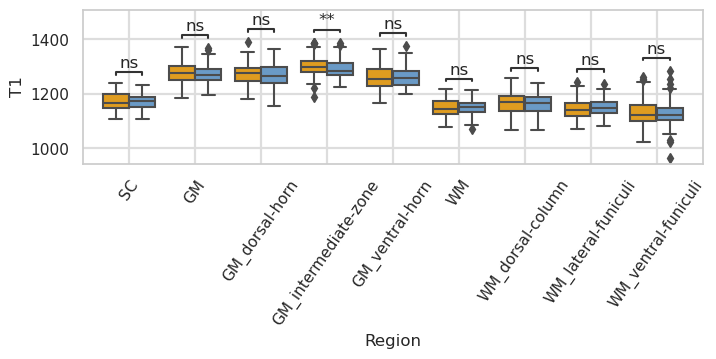

In [18]:

df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C4']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]
print(nuevo_df)
sns.set(style="whitegrid")
plt.figure(figsize=(8,2))
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality" , palette= custom_palette1)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=55)
ax_csa_gm.get_legend().set_visible(False)
pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/T1_all_c4.pdf')

      Laterality           T1  Subject   Slab               Region Class Level
14          Left  1211.823983  sub-001  run-2                   SC    SC    C5
15          Left  1207.024110  sub-001  run-2                   SC    SC    C5
16          Left  1206.152650  sub-001  run-2                   SC    SC    C5
17          Left  1201.472892  sub-001  run-2                   SC    SC    C5
29          Left  1179.065119  sub-002  run-2                   SC    SC    C5
...          ...          ...      ...    ...                  ...   ...   ...
11380      Right  1072.183059  sub-025  run-1  WM_ventral-funiculi    WM    C5
11419      Right  1145.463874  sub-026  run-2  WM_ventral-funiculi    WM    C5
11420      Right  1147.582135  sub-026  run-2  WM_ventral-funiculi    WM    C5
11421      Right  1162.550670  sub-026  run-2  WM_ventral-funiculi    WM    C5
11422      Right  1176.570474  sub-026  run-2  WM_ventral-funiculi    WM    C5

[1404 rows x 7 columns]
p-value annotation legend:


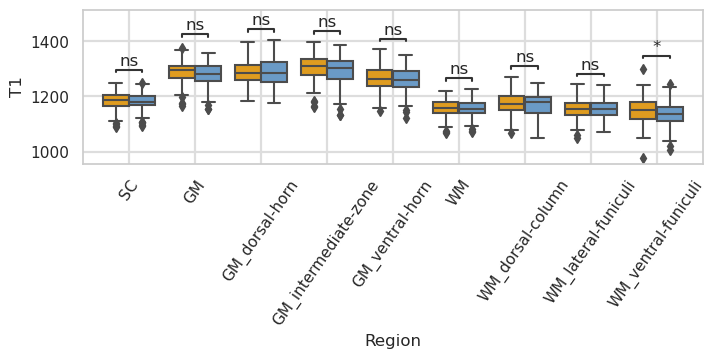

In [19]:

df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C5']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]
print(nuevo_df)
sns.set(style="whitegrid")
plt.figure(figsize=(8,2))
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality" , palette= custom_palette1)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=55)
ax_csa_gm.get_legend().set_visible(False)
pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/T1_all_c5.pdf')

      Laterality           T1  Subject   Slab               Region Class Level
11          Left  1184.783296  sub-001  run-2                   SC    SC    C6
12          Left  1214.662699  sub-001  run-2                   SC    SC    C6
13          Left  1218.797929  sub-001  run-2                   SC    SC    C6
27          Left  1213.449096  sub-002  run-2                   SC    SC    C6
28          Left  1215.798880  sub-002  run-2                   SC    SC    C6
...          ...          ...      ...    ...                  ...   ...   ...
11375      Right  1093.889775  sub-025  run-1  WM_ventral-funiculi    WM    C6
11376      Right  1085.501771  sub-025  run-1  WM_ventral-funiculi    WM    C6
11416      Right  1101.735368  sub-026  run-2  WM_ventral-funiculi    WM    C6
11417      Right  1101.544111  sub-026  run-2  WM_ventral-funiculi    WM    C6
11418      Right  1122.334453  sub-026  run-2  WM_ventral-funiculi    WM    C6

[1134 rows x 7 columns]
p-value annotation legend:


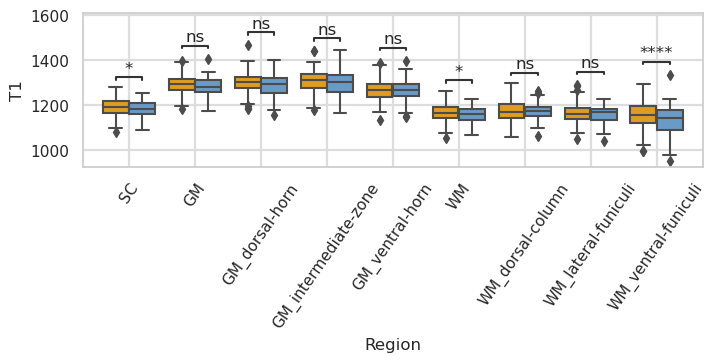

In [20]:

df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C6']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]
print(nuevo_df)
sns.set(style="whitegrid")
plt.figure(figsize=(8,2))
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality" , palette= custom_palette1)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=55)
#plt.legend(loc='best')
ax_csa_gm.get_legend().set_visible(False)

pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/T1_all_c6.pdf')

      Laterality           T1  Subject   Slab               Region Class Level
8           Left  1182.383293  sub-001  run-2                   SC    SC    C7
9           Left  1188.452348  sub-001  run-2                   SC    SC    C7
10          Left  1197.509998  sub-001  run-2                   SC    SC    C7
44          Left  1291.220831  sub-003  run-2                   SC    SC    C7
45          Left  1292.159520  sub-003  run-2                   SC    SC    C7
...          ...          ...      ...    ...                  ...   ...   ...
11372      Right  1153.550636  sub-025  run-1  WM_ventral-funiculi    WM    C7
11373      Right  1071.104104  sub-025  run-1  WM_ventral-funiculi    WM    C7
11413      Right  1136.004921  sub-026  run-2  WM_ventral-funiculi    WM    C7
11414      Right  1110.739859  sub-026  run-2  WM_ventral-funiculi    WM    C7
11415      Right  1126.855733  sub-026  run-2  WM_ventral-funiculi    WM    C7

[828 rows x 7 columns]
p-value annotation legend:
 

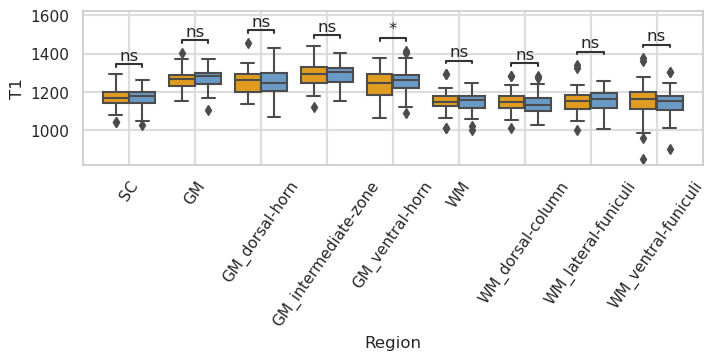

In [22]:

df = result_right
categorias_seleccionadas = ['GM_ventral-horn','GM_intermediate-zone','GM_dorsal-horn','GM','WM_dorsal-column',
                            'WM_lateral-funiculi', 'WM_ventral-funiculi','WM','SC']
level = ['C7']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]
print(nuevo_df)
sns.set(style="whitegrid")
plt.figure(figsize=(8,2))
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality" , palette= custom_palette1)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=55)
ax_csa_gm.get_legend().set_visible(False)
pairs=[
           (("GM_ventral-horn","Left"), ("GM_ventral-horn","Right")),
           (("GM_intermediate-zone","Left"), ("GM_intermediate-zone","Right")),
           (("GM_dorsal-horn","Left"), ("GM_dorsal-horn","Right")),
           (("GM","Left"), ("GM","Right")),
           (("WM_dorsal-column","Left"), ("WM_dorsal-column","Right")),
           (("WM_lateral-funiculi","Left"), ("WM_lateral-funiculi","Right")),
           (("WM_ventral-funiculi","Left"), ("WM_ventral-funiculi","Right")),
           (("WM","Left"), ("WM","Right")),
           (("SC","Left"), ("SC","Right")),
]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/T1_all_c7.pdf')

     Laterality           T1  Subject   Slab                Region Class Level
1451       Left  1282.017471  sub-001  run-2   reticular-formation    GM    C7
1452       Left  1279.856527  sub-001  run-2   reticular-formation    GM    C7
1453       Left  1290.913820  sub-001  run-2   reticular-formation    GM    C7
1454       Left  1293.279902  sub-001  run-2   reticular-formation    GM    C6
1455       Left  1278.544057  sub-001  run-2   reticular-formation    GM    C6
...         ...          ...      ...    ...                   ...   ...   ...
6248      Right  1216.477020  sub-026  run-2  lateral-ventral-horn    GM    C6
6249      Right  1204.246773  sub-026  run-2  lateral-ventral-horn    GM    C5
6250      Right  1265.299424  sub-026  run-2  lateral-ventral-horn    GM    C5
6251      Right  1202.433266  sub-026  run-2  lateral-ventral-horn    GM    C5
6252      Right  1215.376007  sub-026  run-2  lateral-ventral-horn    GM    C5

[2992 rows x 7 columns]
p-value annotation legend:


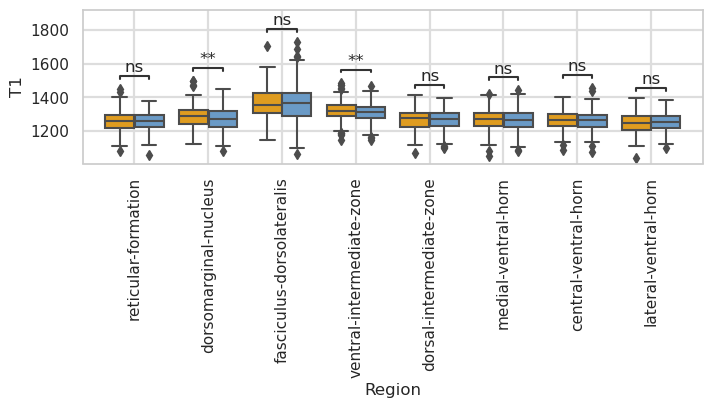

In [23]:
df = result_right
categorias_seleccionadas = ["reticular-formation" ,"dorsomarginal-nucleus", "fasciculus-dorsolateralis", 
"ventral-intermediate-zone","dorsal-intermediate-zone","medial-ventral-horn" , "central-ventral-horn" ,"lateral-ventral-horn"]
level = ['C5','C6','C7']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]
print(nuevo_df)
sns.set(style="whitegrid")

plt.figure(figsize=(8,2))
custom_palette1 = ["#FFA500","#5B9BD5"]
#ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", palette= custom_palette1)
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", palette= custom_palette1) #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=90)
ax_csa_gm.get_legend().set_visible(False)


pairs=[
    (("reticular-formation","Left"), ("reticular-formation","Right")),
    (("dorsomarginal-nucleus","Left"), ("dorsomarginal-nucleus","Right")),
    (("fasciculus-dorsolateralis","Left"), ("fasciculus-dorsolateralis","Right")),
    (("ventral-intermediate-zone","Left"), ("ventral-intermediate-zone","Right")),
    (("dorsal-intermediate-zone","Left"), ("dorsal-intermediate-zone","Right")),
    (("medial-ventral-horn","Left"), ("medial-ventral-horn","Right")),
    (("central-ventral-horn","Left"), ("central-ventral-horn","Right")),
    (("lateral-ventral-horn","Left"), ("lateral-ventral-horn","Right")),
    ]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/final_T1_GM_c5-C7.pdf')

     Laterality           T1  Subject   Slab                Region Class Level
1443       Left  1228.667064  sub-001  run-1   reticular-formation    GM    C3
1444       Left  1201.604509  sub-001  run-1   reticular-formation    GM    C3
1445       Left  1212.639279  sub-001  run-1   reticular-formation    GM    C3
1446       Left  1242.529839  sub-001  run-1   reticular-formation    GM    C2
1447       Left  1266.050130  sub-001  run-1   reticular-formation    GM    C2
...         ...          ...      ...    ...                   ...   ...   ...
6238      Right  1223.892675  sub-026  run-1  lateral-ventral-horn    GM    C2
6239      Right  1255.940560  sub-026  run-1  lateral-ventral-horn    GM    C2
6240      Right  1259.016592  sub-026  run-1  lateral-ventral-horn    GM    C2
6241      Right  1284.465419  sub-026  run-1  lateral-ventral-horn    GM    C2
6242      Right  1283.376191  sub-026  run-1  lateral-ventral-horn    GM    C1

[4704 rows x 7 columns]
p-value annotation legend:


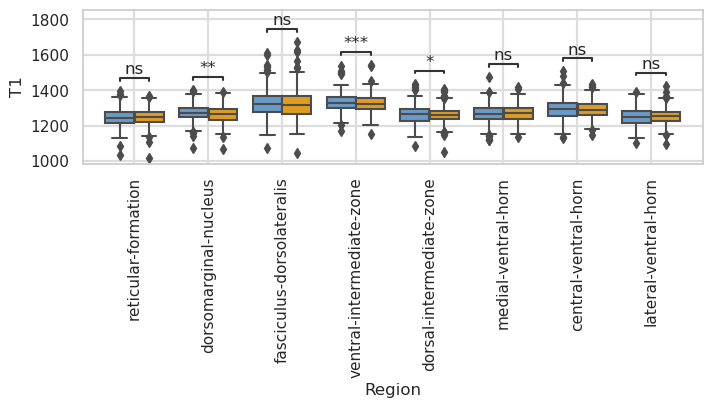

In [24]:
df = result_right
categorias_seleccionadas = ["reticular-formation" ,"dorsomarginal-nucleus", "fasciculus-dorsolateralis", 
"ventral-intermediate-zone","dorsal-intermediate-zone","medial-ventral-horn" , "central-ventral-horn" ,"lateral-ventral-horn"]
level = ['C1','C2','C3','C4']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]
print(nuevo_df)
sns.set(style="whitegrid")

plt.figure(figsize=(8,2))
custom_palette1 = ["#5B9BD5", "#FFA500"]
#ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", palette= custom_palette1)
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", palette= custom_palette1) #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=90)
ax_csa_gm.get_legend().set_visible(False)


pairs=[
    (("reticular-formation","Left"), ("reticular-formation","Right")),
    (("dorsomarginal-nucleus","Left"), ("dorsomarginal-nucleus","Right")),
    (("fasciculus-dorsolateralis","Left"), ("fasciculus-dorsolateralis","Right")),
    (("ventral-intermediate-zone","Left"), ("ventral-intermediate-zone","Right")),
    (("dorsal-intermediate-zone","Left"), ("dorsal-intermediate-zone","Right")),
    (("medial-ventral-horn","Left"), ("medial-ventral-horn","Right")),
    (("central-ventral-horn","Left"), ("central-ventral-horn","Right")),
    (("lateral-ventral-horn","Left"), ("lateral-ventral-horn","Right")),
    ]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/T1_GM_c5-C7.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

medial-reticulospinal_Left vs. medial-reticulospinal_Right: Wilcoxon test (paired samples), P_val:1.994e-02 Stat=7.064e+03
spino-olivary_Left vs. spino-olivary_Right: Wilcoxon test (paired samples), P_val:2.190e-01 Stat=7.878e+03
tectospinal_Left vs. tectospinal_Right: Wilcoxon test (paired samples), P_val:5.020e-04 Stat=6.210e+03
ventral-corticospinal_Left vs. ventral-corticospinal_Right: Wilcoxon test (paired samples), P_val:2.082e-06 Stat=5.272e+03
ventral-reticulospinal_Left vs. ventral-reticulospinal_Right: Wilcoxon test (paired samples), P_val:2.340e-01 Stat=7.907e+03
ventrolateral-reticulospinal_Left vs. ventrolateral-reticulospinal_Right: Wilcoxon test (paired samples), P_val:1.078e-03 Stat=6.366e+03
medial-longitudinal-fasciculus_Left vs. medial-longitudinal-fasciculus_Right: Wilcoxon test (paired s

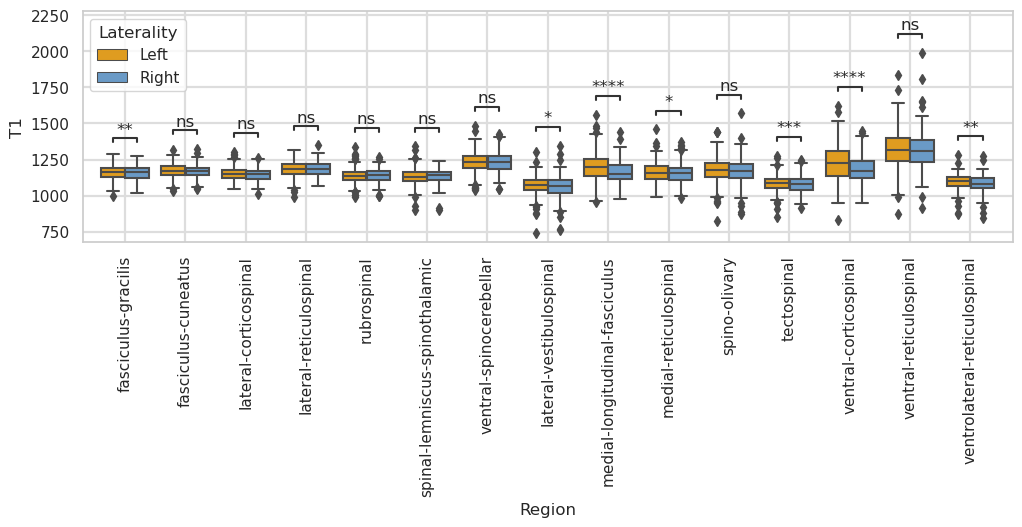

In [25]:
df = result_right
categorias_seleccionadas = ["fasciculus-gracilis" , "fasciculus-cuneatus", "lateral-corticospinal", "lateral-reticulospinal","rubrospinal",
"spinal-lemniscus-spinothalamic", "ventral-spinocerebellar", "lateral-vestibulospinal", "medial-longitudinal-fasciculus" ,
"medial-reticulospinal", "spino-olivary","tectospinal","ventral-corticospinal", "ventral-reticulospinal",
                            "ventrolateral-reticulospinal"]
level = ['C5','C6','C7']
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)& df['Level'].isin(level)]
sns.set(style="whitegrid")
plt.figure(figsize=(12,3))
custom_palette1 = [ "#FFA500" , "#5B9BD5"]
#ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", palette= custom_palette1)
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", palette= custom_palette1)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=90)
#ax_csa_gm.get_legend().set_visible(False)

pairs=[
    (("fasciculus-gracilis","Left"), ("fasciculus-gracilis","Right")),
    (("fasciculus-cuneatus","Left"), ("fasciculus-cuneatus","Right")),
    (("lateral-corticospinal","Left"), ("lateral-corticospinal","Right")),
    (("lateral-reticulospinal","Left"), ("lateral-reticulospinal","Right")),
    (("rubrospinal","Left"), ("rubrospinal","Right")),
    (("spinal-lemniscus-spinothalamic","Left"), ("spinal-lemniscus-spinothalamic","Right")),
    (("ventral-spinocerebellar","Left"), ("ventral-spinocerebellar","Right")),
    (("lateral-vestibulospinal","Left"), ("lateral-vestibulospinal","Right")),
    (("medial-longitudinal-fasciculus","Left"), ("medial-longitudinal-fasciculus","Right")),
    (("medial-reticulospinal","Left"), ("medial-reticulospinal","Right")),
    (("spino-olivary","Left"), ("spino-olivary","Right")),
    (("tectospinal","Left"), ("tectospinal","Right")),
    (("ventral-corticospinal","Left"), ("ventral-corticospinal","Right")),
    (("ventral-reticulospinal","Left"), ("ventral-reticulospinal","Right")),
    (("ventrolateral-reticulospinal","Left"), ("ventrolateral-reticulospinal","Right"))]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/final_T1_WM_c5-C7.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

fasciculus-cuneatus_Left vs. fasciculus-cuneatus_Right: Wilcoxon test (paired samples), P_val:1.095e-03 Stat=4.779e+04
lateral-corticospinal_Left vs. lateral-corticospinal_Right: Wilcoxon test (paired samples), P_val:3.204e-01 Stat=5.470e+04
lateral-reticulospinal_Left vs. lateral-reticulospinal_Right: Wilcoxon test (paired samples), P_val:4.102e-01 Stat=4.175e+04
rubrospinal_Left vs. rubrospinal_Right: Wilcoxon test (paired samples), P_val:4.365e-01 Stat=5.535e+04
spinal-lemniscus-spinothalamic_Left vs. spinal-lemniscus-spinothalamic_Right: Wilcoxon test (paired samples), P_val:2.179e-02 Stat=5.074e+04
ventral-spinocerebellar_Left vs. ventral-spinocerebellar_Right: Wilcoxon test (paired samples), P_val:1.994e-02 Stat=5.064e+04
lateral-vestibulospinal_Left vs. lateral-vestibulospinal_Right: Wilcoxon test (pa

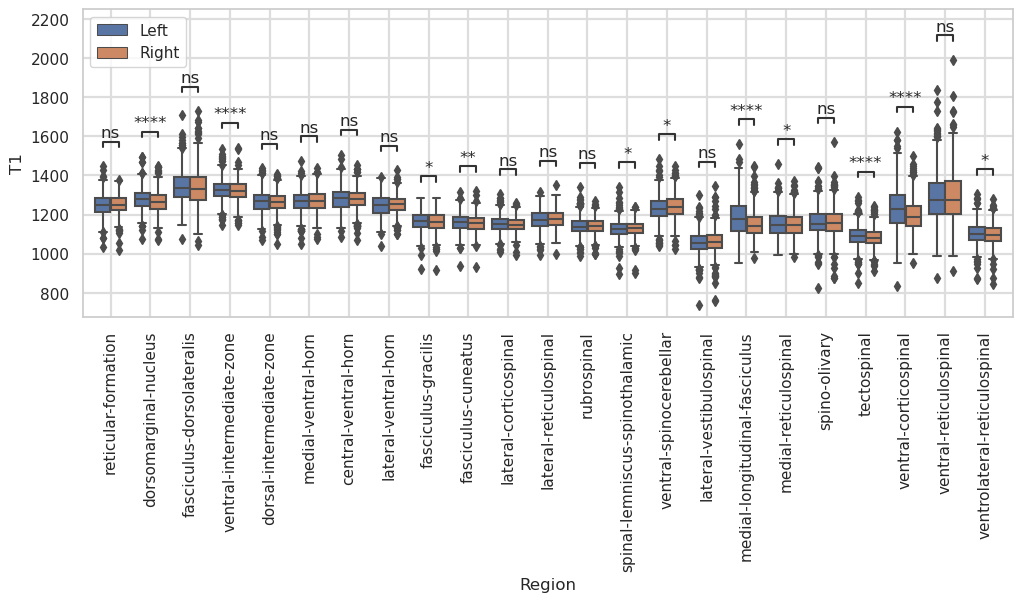

In [26]:
df = result_right
categorias_seleccionadas = ["reticular-formation" ,"dorsomarginal-nucleus", "fasciculus-dorsolateralis", 
"ventral-intermediate-zone","dorsal-intermediate-zone","medial-ventral-horn" , "central-ventral-horn" ,"lateral-ventral-horn",
"fasciculus-gracilis" , "fasciculus-cuneatus", "lateral-corticospinal", "lateral-reticulospinal","rubrospinal",
"spinal-lemniscus-spinothalamic", "ventral-spinocerebellar", "lateral-vestibulospinal", "medial-longitudinal-fasciculus" ,
"medial-reticulospinal", "spino-olivary","tectospinal","ventral-corticospinal", "ventral-reticulospinal",
                            "ventrolateral-reticulospinal"]
nuevo_df =df[df['Region'].isin(categorias_seleccionadas)]
sns.set(style="whitegrid")
plt.figure(figsize=(12,4))
#ax_csa_gm = sns.violinplot(data=nuevo_df, x="Region", y="T1", hue="Laterality", split=True)
ax_csa_gm = sns.boxplot(data=nuevo_df, x="Region", y="T1", hue="Laterality") #, whis=np.inf)
ax_csa_gm.grid(which='major', color='#DDDDDD', linewidth=1.6)

plt.xticks(rotation=90)
plt.legend(loc='best')

pairs=[
    (("reticular-formation","Left"), ("reticular-formation","Right")),
    (("dorsomarginal-nucleus","Left"), ("dorsomarginal-nucleus","Right")),
    (("fasciculus-dorsolateralis","Left"), ("fasciculus-dorsolateralis","Right")),
    (("ventral-intermediate-zone","Left"), ("ventral-intermediate-zone","Right")),
    (("dorsal-intermediate-zone","Left"), ("dorsal-intermediate-zone","Right")),
    (("medial-ventral-horn","Left"), ("medial-ventral-horn","Right")),
    (("central-ventral-horn","Left"), ("central-ventral-horn","Right")),
    (("lateral-ventral-horn","Left"), ("lateral-ventral-horn","Right")),
    (("fasciculus-gracilis","Left"), ("fasciculus-gracilis","Right")),
    (("fasciculus-cuneatus","Left"), ("fasciculus-cuneatus","Right")),
    (("lateral-corticospinal","Left"), ("lateral-corticospinal","Right")),
    (("lateral-reticulospinal","Left"), ("lateral-reticulospinal","Right")),
    (("rubrospinal","Left"), ("rubrospinal","Right")),
    (("spinal-lemniscus-spinothalamic","Left"), ("spinal-lemniscus-spinothalamic","Right")),
    (("ventral-spinocerebellar","Left"), ("ventral-spinocerebellar","Right")),
    (("lateral-vestibulospinal","Left"), ("lateral-vestibulospinal","Right")),
    (("medial-longitudinal-fasciculus","Left"), ("medial-longitudinal-fasciculus","Right")),
    (("medial-reticulospinal","Left"), ("medial-reticulospinal","Right")),
    (("spino-olivary","Left"), ("spino-olivary","Right")),
    (("tectospinal","Left"), ("tectospinal","Right")),
    (("ventral-corticospinal","Left"), ("ventral-corticospinal","Right")),
    (("ventral-reticulospinal","Left"), ("ventral-reticulospinal","Right")),
    (("ventrolateral-reticulospinal","Left"), ("ventrolateral-reticulospinal","Right"))]
annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=nuevo_df, x="Region", y="T1", hue='Laterality')#, order=order)
annotator_csa_gm.configure(test='Wilcoxon', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
plt.savefig('/mnt/d/crmbm/Data_7T_ANISO_HC/derivatives/atlases/fig02.pdf')